# Mini-projet Data Mining : US Adult Income
 ## Classification supervisée

 * ## A-Spécifications fonctionnelles
 
Au cours de ce mini-projet on va aborder l’ensemble des étapes du processus
d’extraction de connaissances à partir de données (ECD).


## A.1. Data understanding :


### 1-Importation des Packages 

a-Importation des Packages du langage Python:

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import seaborn as sns
import warnings
warnings.filterwarnings('ignore');

b-Chargement des ensembles de données:

* ensemble d’apprentissage 

In [4]:
train = "train.csv"
test = "test.csv"
df = pd.read_csv(train)
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


* ensemble de test

In [5]:
test_df = pd.read_csv(test)
test_df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


c-Affichage des données:

un aperçu des 10 premières instances de chaque
ensemble de données

## A- train :

In [6]:
columns = ['Age',
           'Employer_Type',
           'fnlgwt',
           'Education',
           'Ed_Numeric',
           'Marital_Status',
           'Occupation',
           'Relationship',
           'Race',
           'Sex',
           'Capital_Gain',
           'Capital_Loss',
           'Hours_per_Week',
           'Country',
           'Income_Above_Below_50K']
df=pd.read_csv(train, header=1, names=columns)
df.head(10)

,Age,Employer_Type,fnlgwt,Education,Ed_Numeric,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_Week,Country,Income_Above_Below_50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


##  B-test

In [7]:
columns = ['Age',
           'Employer_Type',
           'fnlgwt',
           'Education',
           'Ed_Numeric',
           'Marital_Status',
           'Occupation',
           'Relationship',
           'Race',
           'Sex',
           'Capital_Gain',
           'Capital_Loss',
           'Hours_per_Week',
           'Country',
           'Income_Above_Below_50K']
test_df=pd.read_csv(test, header=1, names=columns)
test_df.head(10)

,Age,Employer_Type,fnlgwt,Education,Ed_Numeric,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_Week,Country,Income_Above_Below_50K
0,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
1,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
2,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
3,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
4,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K.
5,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K.
6,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K.
7,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K.
8,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K.
9,65,Private,184454,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,6418,0,40,United-States,>50K.


d-Description et analyse des données de l’ensemble d’apprentissage :

#### les statistiques descriptives

In [8]:
display(df.describe())

,Age,fnlgwt,Ed_Numeric,Capital_Gain,Capital_Loss,Hours_per_Week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


#### Les caratéristique des données :


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     32560 non-null  int64 
 1   Employer_Type           32560 non-null  object
 2   fnlgwt                  32560 non-null  int64 
 3   Education               32560 non-null  object
 4   Ed_Numeric              32560 non-null  int64 
 5   Marital_Status          32560 non-null  object
 6   Occupation              32560 non-null  object
 7   Relationship            32560 non-null  object
 8   Race                    32560 non-null  object
 9   Sex                     32560 non-null  object
 10  Capital_Gain            32560 non-null  int64 
 11  Capital_Loss            32560 non-null  int64 
 12  Hours_per_Week          32560 non-null  int64 
 13  Country                 32560 non-null  object
 14  Income_Above_Below_50K  32560 non-null  object
dtypes:

e-Visualisation des données

## 1-Histogrammes :


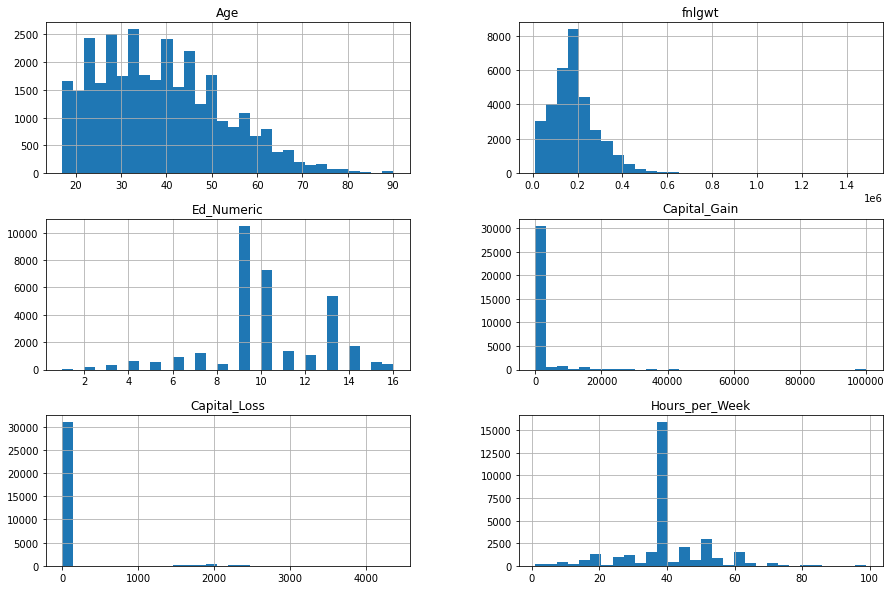

In [10]:
df.hist(bins=30, figsize=(15,10))
plt.show()

## 2-Nuages de points


importer scatter_matrix

In [11]:
from pandas.plotting import scatter_matrix

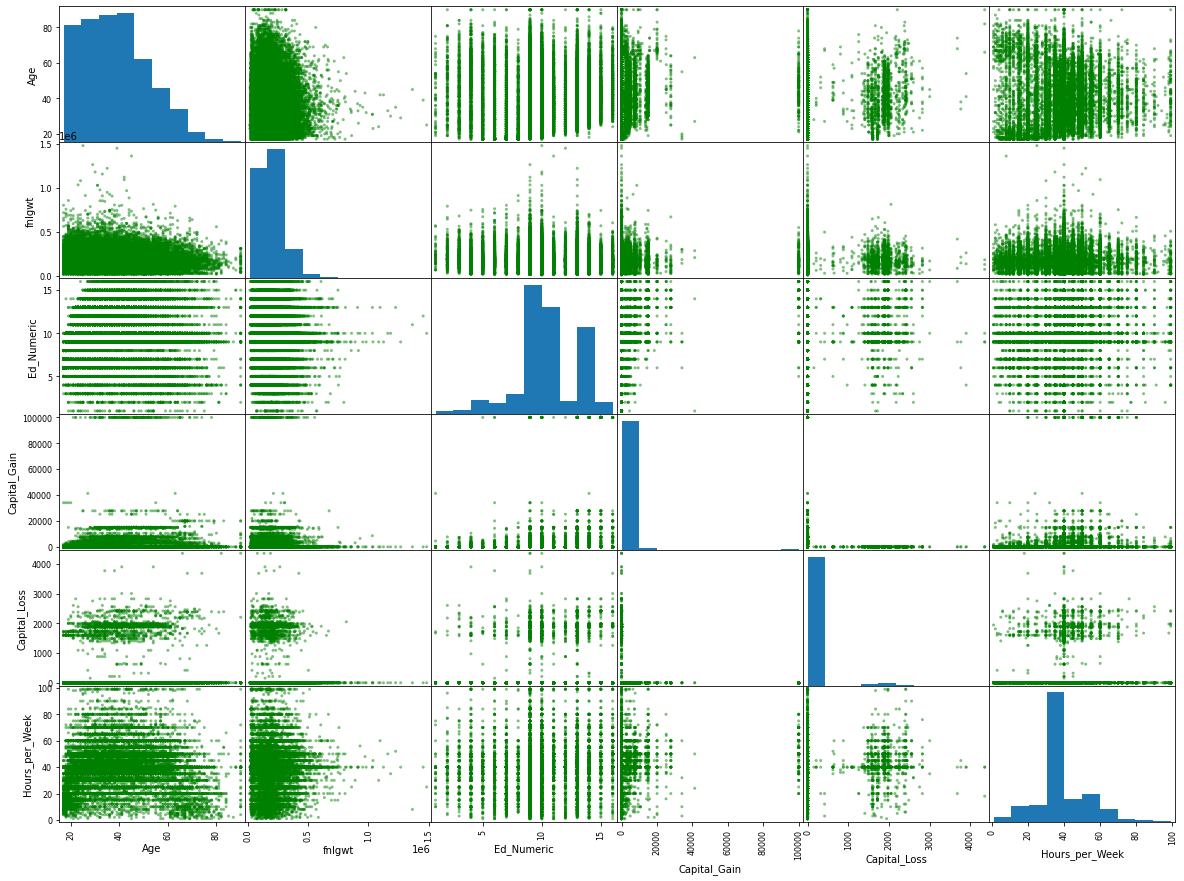

In [12]:
scatter_matrix(df, figsize=(20,15), color='green')
plt.show()

##  3-boîtes à moustaches :

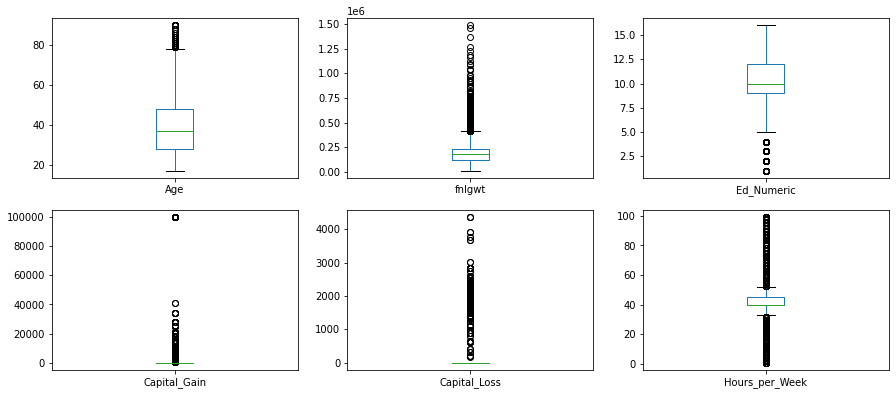

In [13]:
df.plot(kind="box", subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(15,10))
plt.show()

## A-2Nettoyage des données

* on va afficher dans un tableau, le nombre de valeurs
manquantes pour chaque attribut des deux ensembles de données

pour l'ensemble de donnees:


In [14]:
df_missing = (df==' ?').sum()
df_missing

Age                          0
Employer_Type             1836
fnlgwt                       0
Education                    0
Ed_Numeric                   0
Marital_Status               0
Occupation                1843
Relationship                 0
Race                         0
Sex                          0
Capital_Gain                 0
Capital_Loss                 0
Hours_per_Week               0
Country                    583
Income_Above_Below_50K       0
dtype: int64

pour l'ensemble de test:


In [15]:
test_df_missing = (test_df==' ?').sum()
test_df_missing

Age                         0
Employer_Type             963
fnlgwt                      0
Education                   0
Ed_Numeric                  0
Marital_Status              0
Occupation                966
Relationship                0
Race                        0
Sex                         0
Capital_Gain                0
Capital_Loss                0
Hours_per_Week              0
Country                   274
Income_Above_Below_50K      0
dtype: int64

*  Suppression des lignes contenant des données non valides du bloc de données


In [16]:
df = df[(df.astype(str) != ' ?').all(axis=1)]

##### Verification :

In [17]:
len(df)

30161

* Suppression des lignes contenant des données non valides du bloc test

In [18]:
test_df = test_df[(test_df.astype(str) != ' ?').all(axis=1)]


##### Verification :

In [19]:
len(test_df)

15059

### Matrice de corrélation


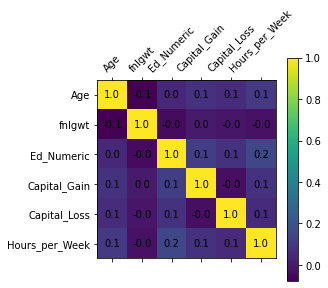

In [20]:
plt.matshow(df.corr())
plt.colorbar()
plt.xticks(np.arange(len(df.corr().columns)), df.corr().columns.values, rotation = 45) 
plt.yticks(np.arange(len(df.corr().columns)), df.corr().columns.values) 
for (i, j), corr in np.ndenumerate(df.corr()):
    plt.text(j, i, '{:0.1f}'.format(corr), ha='center', va='center', color='black')

* Créeation d'une nouvelle colonne pour le revenu qui est binaire:
 * s'il depasse 50k ==> elle va prendre la valeur 1
  *sinon ==> 0

In [21]:
df['Income_Above/Below_50K'] = df.apply(lambda row: 
                                        1 if '>50K' in row['Income_Above_Below_50K'] 
                                        else 0, axis=1)

on va suivre la meme demarche  pour l'ensemble du test

In [22]:
test_df['Income_Above/Below_50K'] = test_df.apply(lambda row: 
                                        1 if '>50K' in row['Income_Above_Below_50K'] 
                                        else 0, axis=1)

 ### la Suppression des colonnes indésirables:

In [23]:
df = df.drop(['Income_Above_Below_50K','fnlgwt','Ed_Numeric','Capital_Gain','Capital_Loss','Country'], axis=1)

test_df = test_df.drop(['Income_Above_Below_50K','fnlgwt','Ed_Numeric','Capital_Gain','Capital_Loss','Country'], axis=1)

df.head(8)

,Age,Employer_Type,Education,Marital_Status,Occupation,Relationship,Race,Sex,Hours_per_Week,Income_Above/Below_50K
0,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,0
1,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,0
2,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,0
3,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,0
4,37,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,0
5,49,Private,9th,Married-spouse-absent,Other-service,Not-in-family,Black,Female,16,0
6,52,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,45,1
7,31,Private,Masters,Never-married,Prof-specialty,Not-in-family,White,Female,50,1


# on a terminer le nettoyage des donnees :



### les graphes des données :


* ###  Marital_Status :


<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

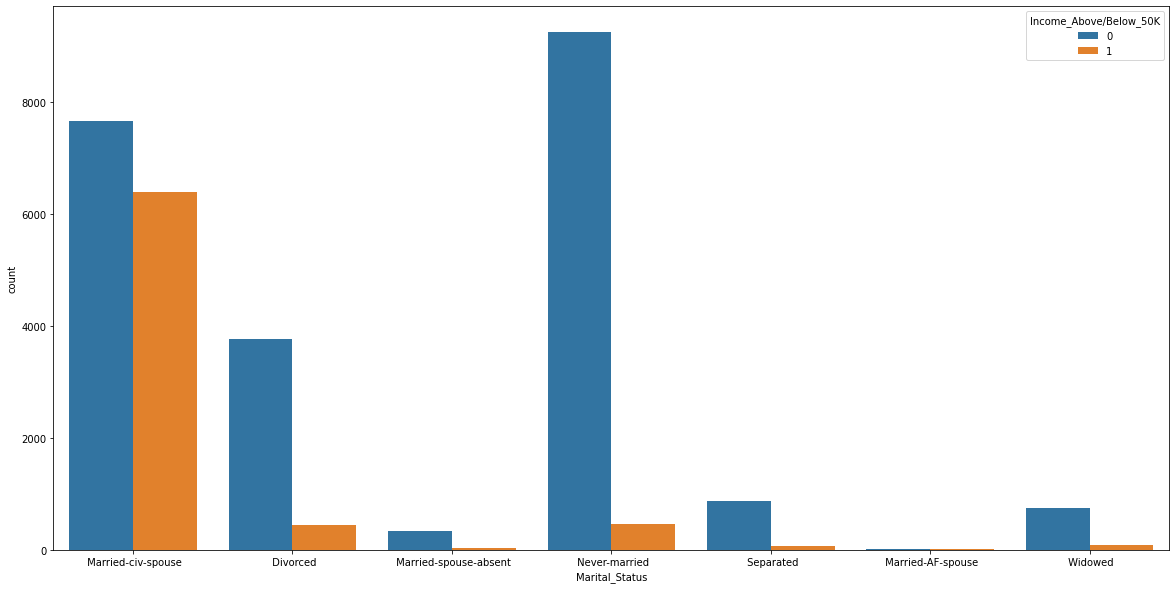

In [24]:
df['Marital_Status'].value_counts()
f, ax = plt.subplots(figsize=(20, 10))
sns.countplot(x = 'Marital_Status', hue = 'Income_Above/Below_50K', data = df)

* ### Occupation :

<AxesSubplot:xlabel='Occupation', ylabel='count'>

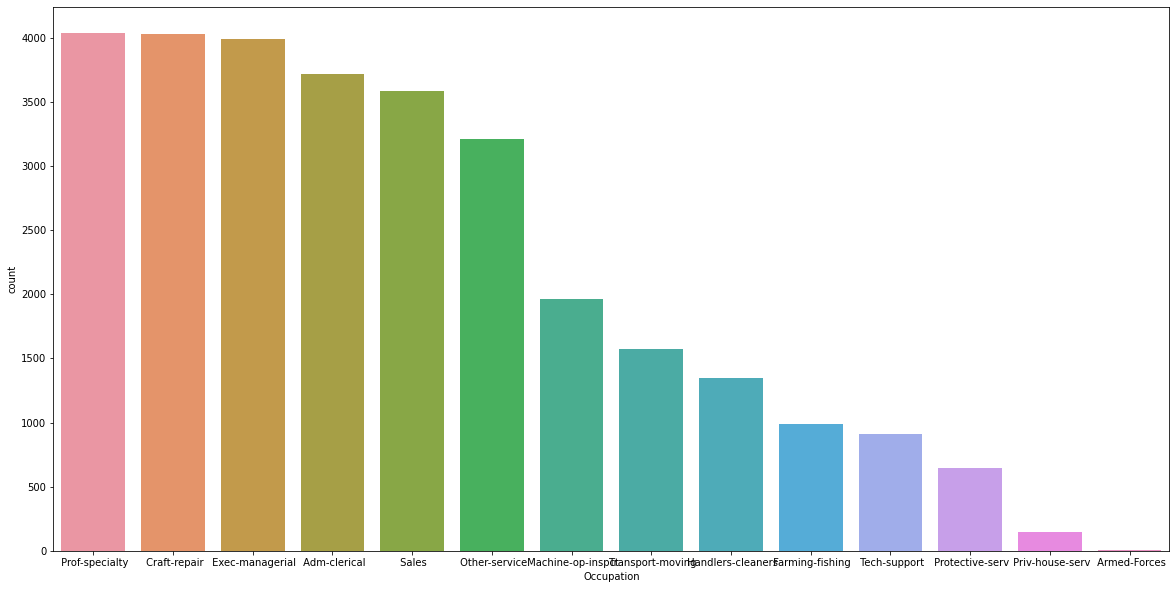

In [25]:
result = df.groupby(["Occupation"]).count().reset_index().sort_values('Income_Above/Below_50K',ascending=False)
f, ax = plt.subplots(figsize=(20, 10))
sns.countplot(df['Occupation'],order=result['Occupation'])

* ### Employer Type :

<AxesSubplot:xlabel='Employer_Type', ylabel='count'>

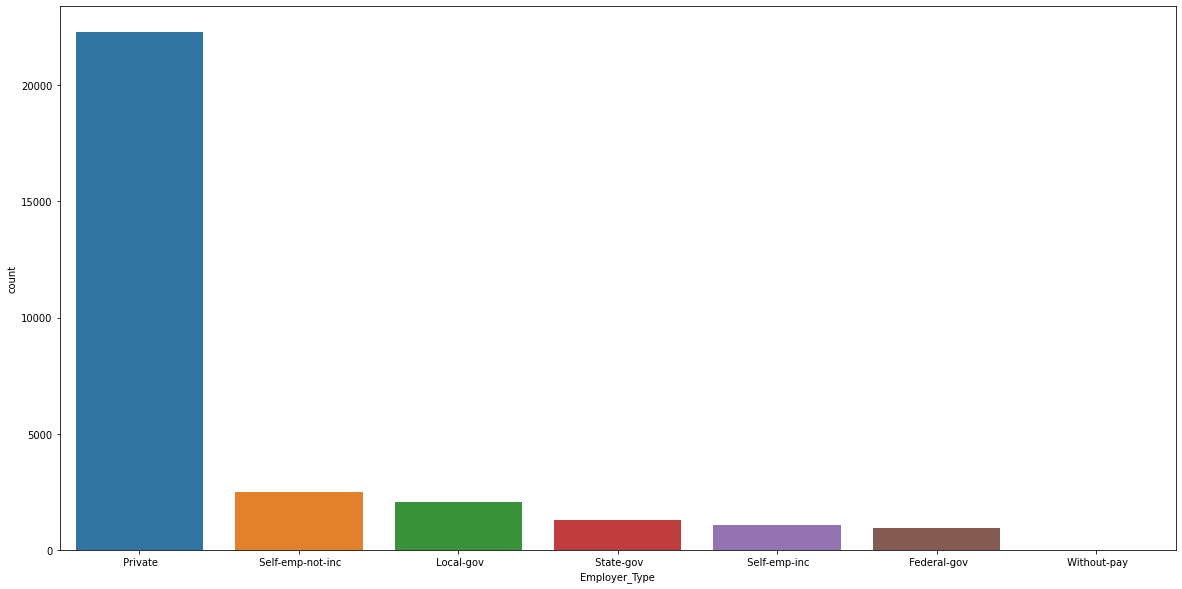

In [26]:
result = df.groupby(["Employer_Type"]).count().reset_index().sort_values('Income_Above/Below_50K',ascending=False)
f, ax = plt.subplots(figsize=(20, 10))
sns.countplot(df['Employer_Type'],order=result['Employer_Type'])

* ### Race :

<AxesSubplot:xlabel='Race', ylabel='count'>

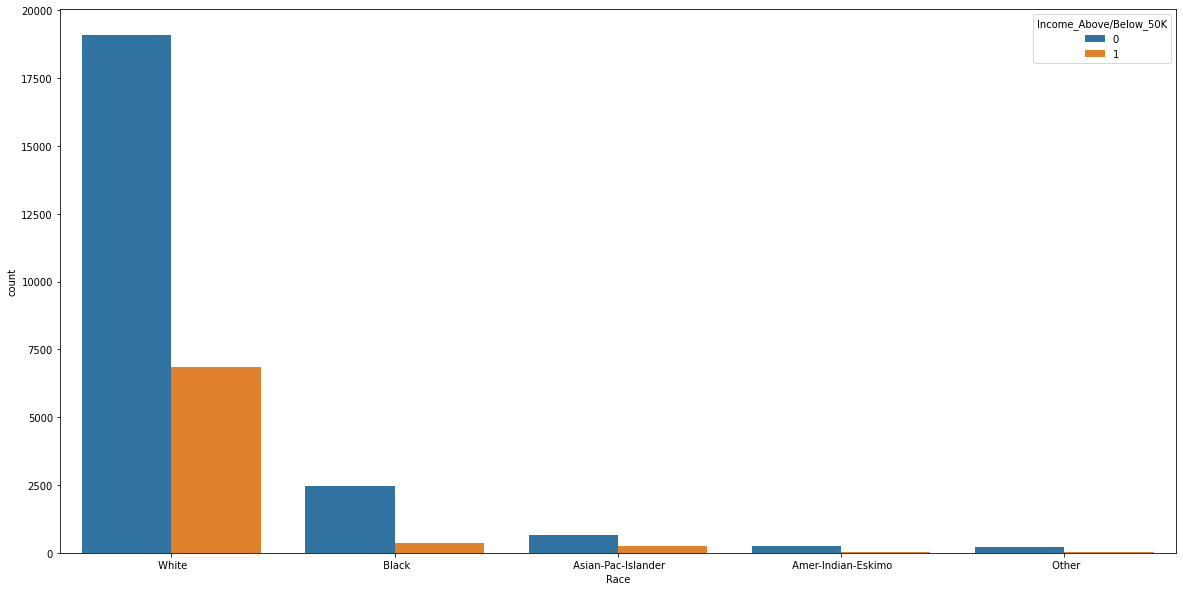

In [27]:
plt.figure(figsize = (20, 10))
sns.countplot(x = 'Race', hue = 'Income_Above/Below_50K', data = df)

* ### Education :

<AxesSubplot:xlabel='Education', ylabel='count'>

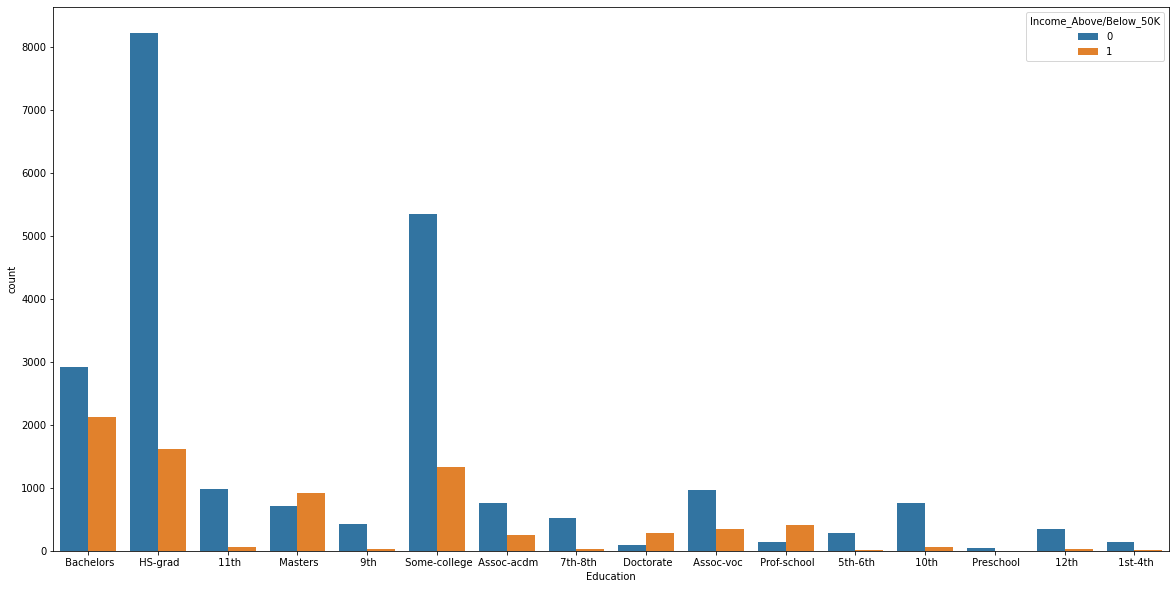

In [28]:
f, ax = plt.subplots(figsize=(20, 10))
sns.countplot(x = 'Education', hue = 'Income_Above/Below_50K', data = df)

* ### Sex:


<AxesSubplot:xlabel='Sex', ylabel='count'>

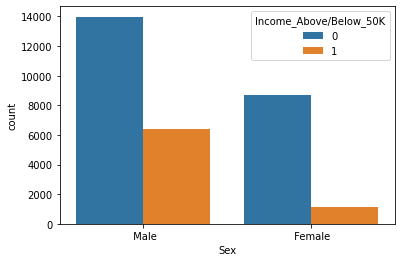

In [29]:
sns.countplot(x = 'Sex', hue = 'Income_Above/Below_50K', data = df)

## A-3Transformation des donnees :

* on va transformer toutes les données
de type catégorielles en données numériques. Dans les deux ensembles de
données (apprentissage et test), repérer les attributs catégoriels et transformer
les en données qualitatives numériques

In [30]:
df1 = pd.get_dummies(df, columns=['Employer_Type',
                                  'Education',
                                  'Marital_Status',
                                  'Occupation',
                                  'Relationship',
                                  'Race',
                                  'Sex'])
test_df1 = pd.get_dummies(test_df, columns=['Employer_Type',
                                  'Education',
                                  'Marital_Status',
                                  'Occupation',
                                  'Relationship',
                                  'Race',
                                  'Sex'])
df1.head()

,Age,Hours_per_Week,Income_Above/Below_50K,Employer_Type_ Federal-gov,Employer_Type_ Local-gov,Employer_Type_ Private,Employer_Type_ Self-emp-inc,Employer_Type_ Self-emp-not-inc,Employer_Type_ State-gov,Employer_Type_ Without-pay,...,Relationship_ Own-child,Relationship_ Unmarried,Relationship_ Wife,Race_ Amer-Indian-Eskimo,Race_ Asian-Pac-Islander,Race_ Black,Race_ Other,Race_ White,Sex_ Female,Sex_ Male
0,50,13,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
1,38,40,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,53,40,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,28,40,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
4,37,40,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0


In [31]:
y_train = df1['Income_Above/Below_50K']
X_train = df1.drop(['Income_Above/Below_50K'], axis = 1)
X_train = pd.get_dummies(X_train)    

y_test = test_df1['Income_Above/Below_50K']
X_test = test_df1.drop(['Income_Above/Below_50K'], axis = 1)
X_test = pd.get_dummies(X_test) 
print("Total features: {}".format(X_test.shape[1]))

Total features: 59


## A.4 Création et optimisation des modèles


# KNN Algorithm :

importer KNeighborsClassifier

In [32]:
from sklearn.neighbors import KNeighborsClassifier

On va parcourir les différentes valeurs de k pour voir celle qui a la plus grande précision

k: 1, Train/Test Score is ==> 0.954/0.762
k: 3, Train/Test Score is ==> 0.879/0.784
k: 5, Train/Test Score is ==> 0.861/0.798
k: 7, Train/Test Score is ==> 0.852/0.804
k: 9, Train/Test Score is ==> 0.846/0.807
k: 11, Train/Test Score is ==> 0.842/0.805
k: 13, Train/Test Score is ==> 0.840/0.806
k: 15, Train/Test Score is ==> 0.836/0.807
k: 17, Train/Test Score is ==> 0.834/0.808
k: 19, Train/Test Score is ==> 0.829/0.809


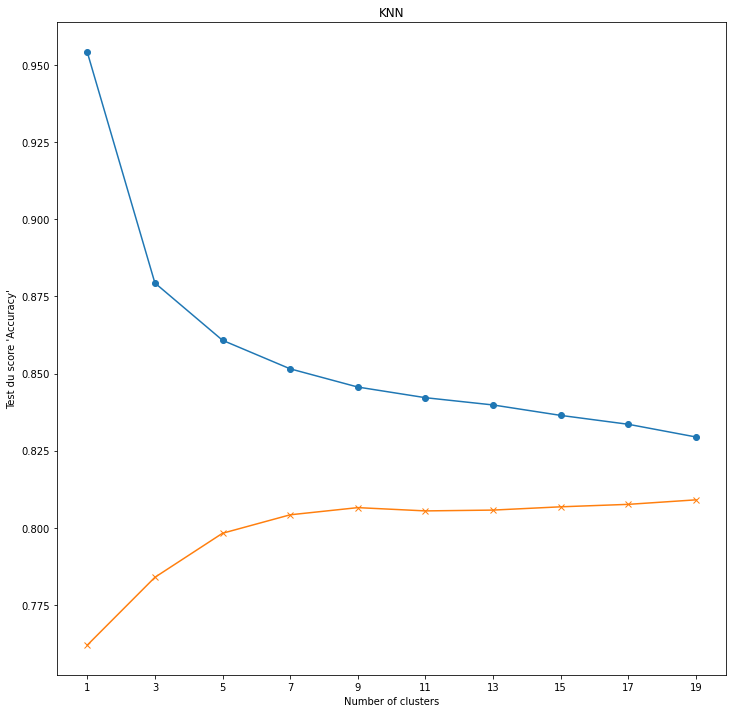

In [33]:
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score is ==> {train_score:.3f}/{test_score:.3f}")
    
plt.figure(figsize = (12, 12))    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xticks([1, 3, 5, 7, 9, 11, 13, 15, 17, 19])
plt.title("KNN")
plt.xlabel("Number of clusters")
plt.ylabel("Test du score 'Accuracy'")
plt.show()

In [33]:
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train, y_train)
print('k=7 Test Accuracy : %.3f' % knn.score(X_test, y_test))

k=7 Test Accuracy : 0.804


# Arbres de decisions (Decision Tree Model)

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

* On transforme les variables catégorielles en variables numériques:


In [35]:
df_categorical = df.select_dtypes(include=['object'])
df_categorical.head()

le = preprocessing.LabelEncoder()
df_categorical = df_categorical.apply(le.fit_transform)
df_categorical.head()

,Employer_Type,Education,Marital_Status,Occupation,Relationship,Race,Sex
0,4,9,2,3,0,4,1
1,2,11,0,5,1,4,1
2,2,1,2,5,0,2,1
3,2,9,2,9,5,2,0
4,2,12,2,3,5,4,0


## Concatenation

In [36]:
df = df.drop(df_categorical.columns,axis=1)
df = pd.concat([df,df_categorical],axis=1)
df.head()

,Age,Hours_per_Week,Income_Above/Below_50K,Employer_Type,Education,Marital_Status,Occupation,Relationship,Race,Sex
0,50,13,0,4,9,2,3,0,4,1
1,38,40,0,2,11,0,5,1,4,1
2,53,40,0,2,1,2,5,0,2,1
3,28,40,0,2,9,2,9,5,2,0
4,37,40,0,2,12,2,3,5,4,0


In [37]:
X = df.drop('Income_Above/Below_50K',axis=1)
y = df['Income_Above/Below_50K']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=99)
X_train.head()

,Age,Hours_per_Week,Employer_Type,Education,Marital_Status,Occupation,Relationship,Race,Sex
31920,25,40,2,9,2,0,5,4,0
15648,37,40,0,8,5,0,1,2,1
4445,49,35,2,11,5,7,1,2,0
23990,62,40,2,8,0,7,1,4,1
30038,25,50,2,11,4,2,3,2,1


* On ajuste l'arbre de décision avec des hyperparamètres par défaut, à part max_depth qui est 5 afin que nous puissions tracer et lire l'arbre.


In [38]:
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [39]:
y_pred_default = dt_default.predict(X_test)
print(classification_report(y_test,y_pred_default))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86      6773
           1       0.58      0.70      0.63      2276

    accuracy                           0.80      9049
   macro avg       0.73      0.77      0.75      9049
weighted avg       0.81      0.80      0.80      9049



In [50]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd
import mglearn
import numpy as np
from IPython.display import display
import matplotlib as pl
import sklearn

In [75]:
import pandas as pd
import numpy as np
from six import StringIO  

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from six import StringIO  

from IPython.display import Image  
import pydotplus

In [76]:
dot_data = StringIO()  
export_graphviz(dt_default, out_file=dot_data,
                feature_names=features, filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

InvocationException: GraphViz's executables not found